<a href="https://colab.research.google.com/github/n-vit/YaP_Projects/blob/main/%D0%A0%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D1%8B%D0%B9_%D1%80%D1%8F%D0%B4_%D1%80%D1%8B%D0%B1%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

определяем распределение веса рыбы в чеках, чтобы задать стандарты.
период 13 - 19 февраля 2023

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hmlnk/full_20230213-20230219.csv', sep= ';', error_bad_lines=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head(3)

,Номер,ДатаПокупки,ВремяПокупки,Подразделение,Магазин,МагазинID,Карта,НомерТелефона,Номенклатура,НоменклатураID,КатегорияТовара,Цена,Количество,ЕдиницаИзмерения,Сумма,ВидОплаты,СписаноБонусов,МобильноеПриложение
0,ИСЛА-001712,13.02.2023,07:28:05,Липецк,Л- 1,d40f4953-9981-11e5-80e0-902b343145c1,NaN,NaN,сиг. Филип Моррис Compact Premium,d6a0bf03-d04e-11e8-80cc-00155d05030d,06. Сигареты,159.00,1.0,шт,159.00,Наличные,NaN,Мобильное приложение
1,ТОРО-002033,13.02.2023,07:51:59,Липецк,Р-14,48c0dd73-1dd6-11e7-80ed-001e67eceb48,NaN,NaN,сиг. Некст Violet SSL,24a4f57f-c0de-11e5-80e4-902b343145c1,06. Сигареты,145.00,1.0,шт,145.00,Банковская карта_безнал,NaN,Мобильное приложение
2,ВСВТ-000766,13.02.2023,07:54:39,Воронеж,Х-18,d40f4964-9981-11e5-80e0-902b343145c1,NaN,NaN,к/и Кофе Joe Black капучино классик 18 гр,75f894f2-4044-11e7-80cd-00155dbfd901,19. Кондит.изд.РФ,26.00,1.0,шт,26.00,Наличные,NaN,Мобильное приложение


Оставим в срезе только рыбу и информацию о количестве товара в чеке

In [4]:
df['КатегорияТовара'].unique()

array(['06. Сигареты', '19. Кондит.изд.РФ', '03. Напитки б/а',
       '20. ПЭТ/Банка', '05. Пиво розлив', '21. Сопутствующие товары',
       '04. Пиво бут.', '08. Снеки мясные', '07. Рыба',
       '13. Сухарики, гренки', '18. Чипсы фасованные', '11. Сыр',
       '12. Орехи вес.', '09. Снеки рыбные ', '01. Алкоголь', '17.Соусы',
       '02. Замор.прод.', '15. Орехи фасов., семечки', '16. Сеты',
       '10. Гастрономия', 'Прочее', 'Оборудование'], dtype=object)

In [5]:
df = df.query('КатегорияТовара == "07. Рыба"')

In [6]:
df = df[['Номенклатура','Количество']]
df.head(3)

,Номенклатура,Количество
66,рыба Мойва х/к,0.07
137,рыба Вобла вял.,0.16
195,рыба Камбала вял,0.07


статистические параметры


In [7]:
df['Номенклатура'].unique()

array(['рыба Мойва х/к', 'рыба Вобла вял.', 'рыба Камбала  вял',
       'рыба Камбала х/к', 'рыба Судак Астраханский вял.',
       'рыба Скумбрия б/г х/к', 'рыба Пелядь вял.',
       'рыба Окунь морской пласт х/к (П-к)', 'рыба Густера вял.',
       'рыба Уклейка вял.',
       'рыба Камбала дальневосточная с икрой вял. СиВ',
       'рыба Камбала-ёрш вял.', 'рыба Синец вял.',
       'рыба Чехонь Астраханская вял.', 'рыба Вомер х/к',
       'Снек Камбала  по-мурмански', 'рыба Лещ Азовский вял.',
       'рыба Корюшка вял. 16+', 'рыба Юкола лососевых х/к (ПР)',
       'рыба Лещ Астраханский вял. (ПР)', 'снек филе Камбалы 50гр',
       'рыба Теша форели х/к (П-к)', 'рыба Карп вял.',
       'рыба Корюшка сахалинская с икрой вял. СиВ',
       ' ! рыба Форель х/к (П-к)', 'рыба Мойва вял.', 'рыба Лещ х/к',
       'рыба Корюшка вял. 21+', 'рыба Пелядь х/к',
       'рыба Уклейка вял 100гр ', '! рыба Палочки кеты х/к',
       'рыба Синец Астраханский вял. СиВ', 'рыба Горбуша пласт х/к (П-к)',
     

In [8]:
df.query('Номенклатура == "рыба Камбала-ёрш вял."')['Количество'].describe().T

count    765.000000
mean       0.187229
std        0.091482
min        0.010000
25%        0.130000
50%        0.170000
75%        0.220000
max        0.820000
Name: Количество, dtype: float64

Нормальные размеры камбалы ерш укладываются в диапазхон 130-220 гр. 

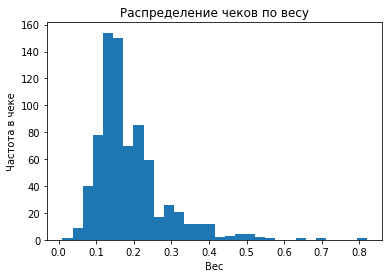

In [9]:
df.query('Номенклатура == "рыба Камбала-ёрш вял."')['Количество'].plot(y= 'Количество', kind= 'hist', bins= 30)
plt.title('Распределение чеков по весу')
plt.xlabel('Вес')
plt.ylabel('Частота в чеке')
plt.show()

Распределение нормальное (правое плечо длиннее за счет того что в некоторые чеки берут не по одной рыбе)